In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
nltk.download('punkt')

%matplotlib inline
timer_initial = datetime.now()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Data Extraction

### 1.1 Setting up folder and file name

In [2]:
f_path = '../datasets/Stack Overflow/'
train = 'Train.csv'
test = 'Test.csv'

### 1.2 Read data from CSV files

In [3]:
timer = datetime.now()
train_Stk_Ovrfl_df = pd.read_csv(f_path+train, sep=',', encoding='latin-1')
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df.head()

Time taken:  0:01:08.742704


,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [4]:
train_Stk_Ovrfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034195 entries, 0 to 6034194
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Title   object
 2   Body    object
 3   Tags    object
dtypes: int64(1), object(3)
memory usage: 184.1+ MB


In [5]:
# test_Stk_Ovrfl_df = pd.read_csv(f_path+test, sep=',', encoding='latin-1')
# test_Stk_Ovrfl_df.head()

## 2. Data Exploration

### 2.1 Remove Duplicates

In [6]:
timer = datetime.now()

train_Stk_Ovrfl_df.drop_duplicates()
print("Time taken: ", datetime.now() - timer)

Time taken:  0:00:29.493097


In [7]:
timer = datetime.now()

duplicates_train_Stk_Ovrfl_df = train_Stk_Ovrfl_df[train_Stk_Ovrfl_df.duplicated(['Title','Body','Tags'])]
print("Time taken: ", datetime.now() - timer)
duplicates_train_Stk_Ovrfl_df.info()

Time taken:  0:00:27.530719
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827881 entries, 3550 to 6034193
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Title   object
 2   Body    object
 3   Tags    object
dtypes: int64(1), object(3)
memory usage: 69.7+ MB


In [8]:
duplicates_train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
3550,3551,Compatibility issues with <a> and calling a fu...,<p>I am new to javascript. I wrote the followi...,function anchor
5246,5247,Using JTA with Spring +hibernate JPA+Glassfish...,<p>I have been struggling with this issues and...,spring hibernate jpa glassfish jta
9968,9969,Groovy Properties Assertion Fails,<p>Here is the content of my groovy file:</p>\...,properties groovy assert
10597,10598,Importance of isomorphic functions,<p><strong>Short Question:</strong> What is th...,functional-programming isomorphism
10939,10940,VB6 Form.Show is not working,<p>I have a project with graphs that can be pr...,forms vb6


In [9]:
duplicates_train_Stk_Ovrfl_df[duplicates_train_Stk_Ovrfl_df.Id == 3551]

,Id,Title,Body,Tags
3550,3551,Compatibility issues with <a> and calling a fu...,<p>I am new to javascript. I wrote the followi...,function anchor


In [10]:
print(duplicates_train_Stk_Ovrfl_df[duplicates_train_Stk_Ovrfl_df.Title.str.contains('Compatibility issues with <a> and calling a fu')])

              Id                                              Title  \
3550        3551  Compatibility issues with <a> and calling a fu...   
1851883  1851884  Compatibility issues with <a> and calling a fu...   

                                                      Body             Tags  
3550     <p>I am new to javascript. I wrote the followi...  function anchor  
1851883  <p>I am new to javascript. I wrote the followi...  function anchor  


In [11]:
print(train_Stk_Ovrfl_df[train_Stk_Ovrfl_df.Title.str.contains('Compatibility issues with <a> and calling a fu')])

              Id                                              Title  \
2382        2383  Compatibility issues with <a> and calling a fu...   
3550        3551  Compatibility issues with <a> and calling a fu...   
1851883  1851884  Compatibility issues with <a> and calling a fu...   

                                                      Body             Tags  
2382     <p>I am new to javascript. I wrote the followi...  function anchor  
3550     <p>I am new to javascript. I wrote the followi...  function anchor  
1851883  <p>I am new to javascript. I wrote the followi...  function anchor  


In [12]:
duplicate_percenatge = ((duplicates_train_Stk_Ovrfl_df.shape[0])/train_Stk_Ovrfl_df.shape[0])*100
print("Percentage of duplicate questions: {}%".format(duplicate_percenatge) )

Percentage of duplicate questions: 30.29204392632323%


In [13]:
train_Stk_Ovrfl_df = train_Stk_Ovrfl_df.drop(duplicates_train_Stk_Ovrfl_df.index)
train_Stk_Ovrfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206314 entries, 0 to 6034194
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Title   object
 2   Body    object
 3   Tags    object
dtypes: int64(1), object(3)
memory usage: 160.5+ MB


In [14]:
timer = datetime.now()

duplicates_train_Stk_Ovrfl_df = train_Stk_Ovrfl_df[train_Stk_Ovrfl_df.duplicated(['Title','Body','Tags'])]
duplicate_percentage = ((duplicates_train_Stk_Ovrfl_df.shape[0])/train_Stk_Ovrfl_df.shape[0])*100
print("Percentage of duplicate questions: {}%".format(duplicate_percentage))
print("Time taken: ", datetime.now() - timer)

Percentage of duplicate questions: 0.0%
Time taken:  0:00:21.657091


In [15]:
duplicates_train_Stk_Ovrfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      0 non-null      int64 
 1   Title   0 non-null      object
 2   Body    0 non-null      object
 3   Tags    0 non-null      object
dtypes: int64(1), object(3)
memory usage: 0.0+ bytes


In [16]:
# temp_train_Stk_Ovrfl_df = train_Stk_Ovrfl_df.copy()

In [17]:
train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


### 2.2 Drop Nulls

In [18]:
train_Stk_Ovrfl_df = train_Stk_Ovrfl_df.dropna()

### 2.3 Tag Analysis

In [19]:
timer = datetime.now()

train_Stk_Ovrfl_df["Tag Count"] = train_Stk_Ovrfl_df["Tags"].apply(lambda x: len(str(x).split(" ")))
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df.head()

Time taken:  0:00:02.294336


,Id,Title,Body,Tags,Tag Count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


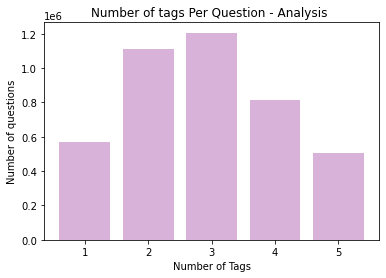

In [20]:
tagwise_count = train_Stk_Ovrfl_df.groupby('Tag Count').count()
tagwise_count = tagwise_count.reset_index()
plt.bar(tagwise_count['Tag Count'],tagwise_count['Tags'], color='purple', alpha=.3)
plt.title("Number of tags Per Question - Analysis ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

### 2.4 Tag Frequency Analysis

In [21]:
del train_Stk_Ovrfl_df['Tag Count']
train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

timer = datetime.now()
tag_vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))
vectorized_Tag = tag_vectorizer.fit_transform(train_Stk_Ovrfl_df["Tags"]) #.values.astype('U'))
#tags = pd.DataFrame(tag_vectorizer.get_feature_names(), columns = ['Tag'])
print("Time taken: ", datetime.now() - timer)
#tags.info()

Time taken:  0:00:14.468664


In [23]:
total_tag_count = vectorized_Tag.shape[0]
unique_tag_count = vectorized_Tag.shape[1]
print("Total No. of Tags:", total_tag_count)
print("Total No. of unique Tags :", unique_tag_count)

Total No. of Tags: 4206307
Total No. of unique Tags : 42048


In [24]:
# Tokenized Tags
individual_tags = tag_vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Invidual Tags - Example:", individual_tags[:25])

Invidual Tags - Example: ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc', '.mobi', '.mov', '.net', '.net-1.0', '.net-1.1']


In [25]:
tag_frequency = vectorized_Tag.sum(axis=0).A1
tag_frequency

array([18, 37,  1, ...,  8, 32,  1], dtype=int64)

In [26]:
tag_dictionary = {'Tags': individual_tags, 'Frequency': tag_frequency}
tag_frequency_df = pd.DataFrame(tag_dictionary)
tag_frequency_df.head()

,Tags,Frequency
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [27]:
tag_frequency_df.sort_values(by=['Frequency'], inplace=True, ascending=False)
tag_frequency_df.head(10)

,Tags,Frequency
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436
18608,jquery,221533
4346,c++,143936
29101,python,134137
17643,iphone,128681
2215,asp.net,125651


In [28]:
#tag_freq_df = pd.DataFrame(train_Stk_Ovrfl_df_Temp.Tags.str.split(" ").tolist(), index=train_Stk_Ovrfl_df_Temp.Id).stack()

#tag_freq_df = train_Stk_Ovrfl_df.Tags.str.split(' ').tolist()
# train_Stk_Ovrfl_df_Temp.assign(Tags=train_Stk_Ovrfl_df_Temp.Tags.str.split(' ')).explode('Tags')
#tag_freq_df = tag_freq_df.reset_index([0, 'Id'])
#tag_freq_df.columns = ['Id', 'Tag']
#tag_freq_df

In [29]:
tag_string = ''
def tag_maker(tag):
    tag_string = ' '+tag
    return tag_string

tag_string = tag_frequency_df.Tags.apply(tag_maker)
print(len(tag_string))
tag_string

42048


4337              c#
18069           java
27249            php
18157     javascript
1234         android
            ...     
29936      rbindlist
29934           rbga
29930           rbar
2925         azureus
42047        zzt-oop
Name: Tags, Length: 42048, dtype: object

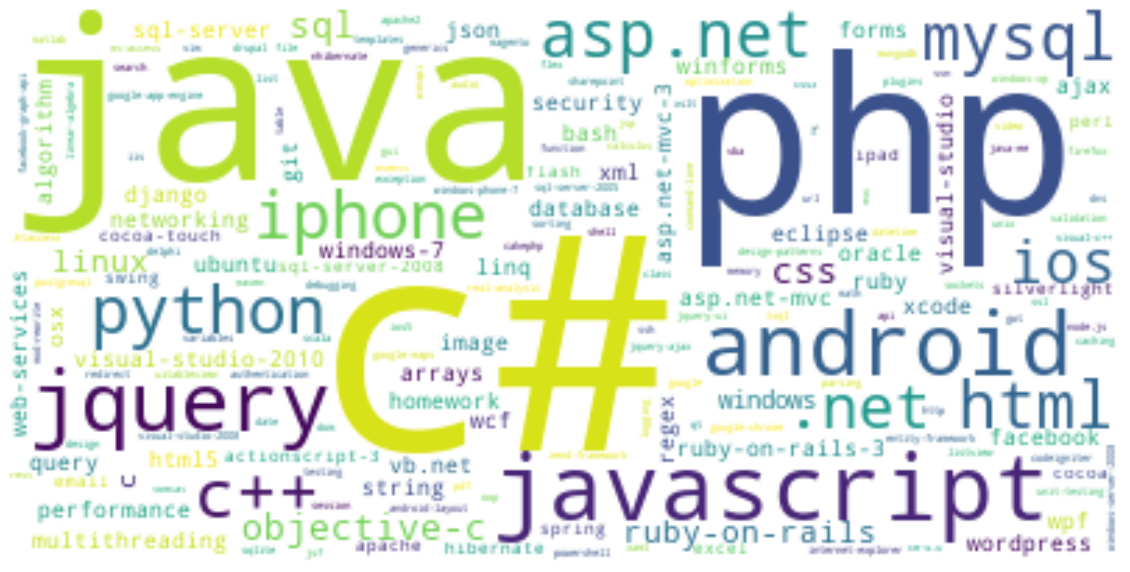

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:
tag_count_wc = dict(zip(tag_frequency_df['Tags'], tag_frequency_df['Frequency']))
tag_count_wc = dict(tag_count_wc.items())
wordcloud = WordCloud(background_color="white").generate_from_frequencies(tag_count_wc)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
"""timer = datetime.now()
tag_count = train_Stk_Ovrfl_df_Temp.groupby('Tags').count()
tag_count = tag_count.reset_index()
tag_count.rename(columns={"Id": "Count"}, inplace = True)
print("Time taken: ", datetime.now() - timer)
tag_count.head(10) """

'timer = datetime.now()\ntag_count = train_Stk_Ovrfl_df_Temp.groupby(\'Tags\').count()\ntag_count = tag_count.reset_index()\ntag_count.rename(columns={"Id": "Count"}, inplace = True)\nprint("Time taken: ", datetime.now() - timer)\ntag_count.head(10) '

<Figure size 1800x1440 with 0 Axes>

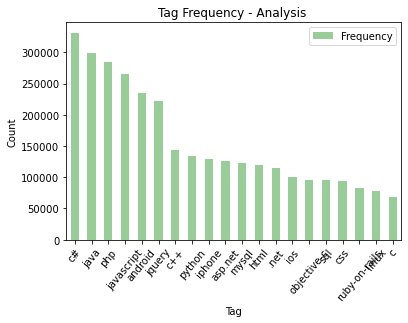

In [32]:
plt.figure(figsize=(25,20))
"""plt.bar(tag_count['Tag'],tag_count['Count'])
plt.title("Tag Frequency - Analysis ")
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.show()
"""
#['Frequency']
tag_frequency_df.head(20).plot.bar(x='Tags', y='Frequency',color='green', alpha=.4)
plt.title("Tag Frequency - Analysis ")
plt.xticks(rotation=50)
#plt.xticks(tag_count_df.index,tag_sample_df["Tag"].values)
plt.xlabel("Tag")
plt.ylabel("Count")
plt.show()

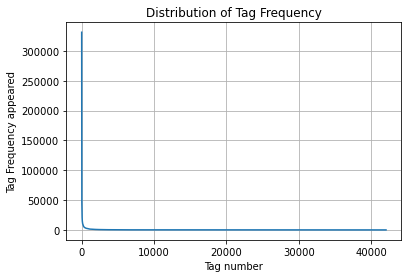

In [33]:
tag_frequency_df = tag_frequency_df.sort_values(['Frequency'], ascending=False)
plt.plot(tag_frequency_df['Frequency'].values)
plt.title("Distribution of Tag Frequency")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Tag Frequency appeared")
plt.show()

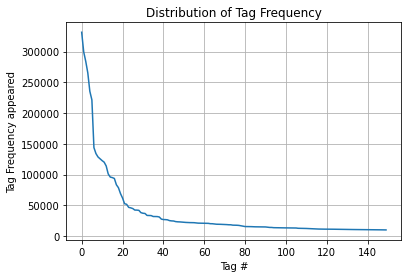

In [34]:
# tag_frequency_df = tag_frequency_df.sort_values(['Frequency'], ascending=False)
plt.plot(tag_frequency_df['Frequency'].values[0:150])
plt.title("Distribution of Tag Frequency")
plt.grid()
plt.xlabel("Tag #")
plt.ylabel("Tag Frequency appeared")
plt.show()

In [35]:
tag_10_frequency = tag_frequency_df['Frequency'].values[0:10]
print(tag_10_frequency.sum(), total_tag_count)
print("Percentage of total tags covered by first 20 tags: {}%".format(tag_10_frequency.sum()/total_tag_count*100))


2169819 4206307
Percentage of total tags covered by first 20 tags: 51.58489382729316%


In [36]:
top_10_tags = tag_frequency_df['Tags'].values[0:tag_10_frequency.shape[0]]
top_10_tags

array(['c#', 'java', 'php', 'javascript', 'android', 'jquery', 'c++',
       'python', 'iphone', 'asp.net'], dtype=object)

In [37]:
id_list = []
title_list = []
body_list = []
tags_list = []
# pattern = '|'.join(top_10_tags)
timer = datetime.now()
for index in train_Stk_Ovrfl_df.index:
    if bool([tag for tag in top_10_tags if(tag in train_Stk_Ovrfl_df['Tags'][index])]):
        id_list.append(train_Stk_Ovrfl_df['Id'][index])
        title_list.append(train_Stk_Ovrfl_df['Title'][index])
        body_list.append(train_Stk_Ovrfl_df['Body'][index])
        tags_list.append(train_Stk_Ovrfl_df['Tags'][index])
print("Time taken: ", datetime.now() - timer)

Time taken:  0:16:11.749322


In [43]:
train_Stk_Ovrfl_df = pd.DataFrame({'Id':id_list, 'Title':title_list, 'Body':body_list, 'Tags':tags_list})
print("Total Time taken - So far: ", datetime.now() - timer_initial)
train_Stk_Ovrfl_df.head(10)

Total Time taken - So far:  0:53:43.515974


,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
2,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
3,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7
4,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation
5,16,PHP framework URL conventions,<p>A lot of frameworks use URL conventions lik...,php url-routing conventions
6,19,Play framework auto javascript and CSS minifier,<p>Does anyone know a good play plugin that au...,javascript code-generation playframework minify
7,20,Creating a repetitive node from a hash array w...,<p>=) I need your kindly help to accomplish a ...,php xml hash multidimensional-array simplexml-...
8,22,Get all +ve number count in LINQ,<p>I am using the following thing:</p>\n\n<pre...,c# .net linq
9,25,C# Converting set flags in a variable of type ...,<p>I came up with this piece of code that conv...,c# linq string enumeration


# 3. Data Wrangling

### 3.1 Removing HTML tags

In [40]:
def html_cleanser(body):
    #body = BeautifulSoup(questions_df['Body'][0], 'html.parser').replace('\n','')
    soup = BeautifulSoup(body, 'html.parser')
    soup = soup.text.replace('\n', '')
    #soup = soup.text.replace('<p>', '')
    return soup


In [45]:
timer = datetime.now()

train_Stk_Ovrfl_df['Body'] = train_Stk_Ovrfl_df['Body'].apply(html_cleanser)

print("Time taken: ", datetime.now() - timer)

C:\Users\sujau\anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:102: UserWarning: expected name token at '<![.])\\w+"`I\'m parsi'
  warnings.warn(msg)


TypeError: cannot unpack non-iterable NoneType object

### 3.2 Checking NULL values

In [47]:
train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,I'd like to check if an uploaded file is an im...,php image-processing file-upload upload mime-t...
1,4,How do I replace special characters in a URL?,"This is probably very simple, but I simply can...",c# url encoding
2,5,How to modify whois contact details?,function modify(.......){ $mcontact = file_ge...,php api file-get-contents
3,8,How to fetch an XML feed using asp.net,I've decided to convert a Windows Phone 7 app ...,c# asp.net windows-phone-7
4,9,.NET library for generating javascript?,Do you know of a .NET library for generating j...,.net javascript code-generation


In [48]:
train_Stk_Ovrfl_df.isnull().sum()

Id       0
Title    0
Body     0
Tags     0
dtype: int64

In [49]:
train_Stk_Ovrfl_df= train_Stk_Ovrfl_df.dropna()
train_Stk_Ovrfl_df.isnull().sum()

Id       0
Title    0
Body     0
Tags     0
dtype: int64

In [50]:
train_Stk_Ovrfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034420 entries, 0 to 2034419
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Title   object
 2   Body    object
 3   Tags    object
dtypes: int64(1), object(3)
memory usage: 77.6+ MB


### 3.3 Removing Emojis

In [51]:
def deEmojify(body):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',body)

In [52]:
timer = datetime.now()

train_Stk_Ovrfl_df['Body'] = train_Stk_Ovrfl_df['Body'].apply(deEmojify)


print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df.head(10)

Time taken:  0:00:32.283405


,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,I'd like to check if an uploaded file is an im...,php image-processing file-upload upload mime-t...
1,4,How do I replace special characters in a URL?,"This is probably very simple, but I simply can...",c# url encoding
2,5,How to modify whois contact details?,function modify(.......){ $mcontact = file_ge...,php api file-get-contents
3,8,How to fetch an XML feed using asp.net,I've decided to convert a Windows Phone 7 app ...,c# asp.net windows-phone-7
4,9,.NET library for generating javascript?,Do you know of a .NET library for generating j...,.net javascript code-generation
5,16,PHP framework URL conventions,A lot of frameworks use URL conventions like /...,php url-routing conventions
6,19,Play framework auto javascript and CSS minifier,Does anyone know a good play plugin that autom...,javascript code-generation playframework minify
7,20,Creating a repetitive node from a hash array w...,=) I need your kindly help to accomplish a sim...,php xml hash multidimensional-array simplexml-...
8,22,Get all +ve number count in LINQ,"I am using the following thing:int[] a = {1, 2...",c# .net linq
9,25,C# Converting set flags in a variable of type ...,I came up with this piece of code that convert...,c# linq string enumeration


# 4. Data Wrangling using Natural Language Processing

### 4.1 Feature Engineering Imports

In [53]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
volume_initializer = 3 # VOlume initializer to set size based on computing resource.

In [54]:
# train_Stk_Ovrfl_df_0_15_M = train_Stk_Ovrfl_df.head(150000)
train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,I'd like to check if an uploaded file is an im...,php image-processing file-upload upload mime-t...
1,4,How do I replace special characters in a URL?,"This is probably very simple, but I simply can...",c# url encoding
2,5,How to modify whois contact details?,function modify(.......){ $mcontact = file_ge...,php api file-get-contents
3,8,How to fetch an XML feed using asp.net,I've decided to convert a Windows Phone 7 app ...,c# asp.net windows-phone-7
4,9,.NET library for generating javascript?,Do you know of a .NET library for generating j...,.net javascript code-generation


### 4.2 Encoding

In [55]:
timer = datetime.now()
train_Stk_Ovrfl_df['Title']=train_Stk_Ovrfl_df['Title'].apply(lambda a : str(a.encode('utf-8')))
#train_Stk_Ovrfl_df_100K.map_partitions(lambda x : str(x.encode('utf-8'))
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df.head()

Time taken:  0:00:01.504396


,Id,Title,Body,Tags
0,1,b'How to check if an uploaded file is an image...,I'd like to check if an uploaded file is an im...,php image-processing file-upload upload mime-t...
1,4,b'How do I replace special characters in a URL?',"This is probably very simple, but I simply can...",c# url encoding
2,5,b'How to modify whois contact details?',function modify(.......){ $mcontact = file_ge...,php api file-get-contents
3,8,b'How to fetch an XML feed using asp.net',I've decided to convert a Windows Phone 7 app ...,c# asp.net windows-phone-7
4,9,b'.NET library for generating javascript?',Do you know of a .NET library for generating j...,.net javascript code-generation


In [56]:
print('test')
sample_text = "Oh man, this is pretty cool. We will do more such things."
text_tokens = word_tokenize(sample_text)

# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
tokens_without_sw = ' '.join([word for word in text_tokens if not word in stopwords.words('english')])

print(text_tokens)
print(tokens_without_sw)
    

test
['Oh', 'man', ',', 'this', 'is', 'pretty', 'cool', '.', 'We', 'will', 'do', 'more', 'such', 'things', '.']
Oh man , pretty cool . We things .


### 4.3 Remove Stopwords

In [57]:
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = ' '.join([word for word in text_tokens if not word in stopwords.words('english')])
    return tokens_without_sw

 

In [58]:
#words=word_tokenize(str(train_Stk_Ovrfl_df_100K['Title'].lower()))
# train_Stk_Ovrfl_df_100k.head()
train_Stk_Ovrfl_df.head()

,Id,Title,Body,Tags
0,1,b'How to check if an uploaded file is an image...,I'd like to check if an uploaded file is an im...,php image-processing file-upload upload mime-t...
1,4,b'How do I replace special characters in a URL?',"This is probably very simple, but I simply can...",c# url encoding
2,5,b'How to modify whois contact details?',function modify(.......){ $mcontact = file_ge...,php api file-get-contents
3,8,b'How to fetch an XML feed using asp.net',I've decided to convert a Windows Phone 7 app ...,c# asp.net windows-phone-7
4,9,b'.NET library for generating javascript?',Do you know of a .NET library for generating j...,.net javascript code-generation


In [59]:
#train_Stk_Ovrfl_df_100K['Title']=train_Stk_Ovrfl_df_100K['Title'].apply(lambda x : x.lower.values())

In [ ]:
# train_Stk_Ovrfl_df_50K = train_Stk_Ovrfl_df.head(50000)
timer = datetime.now()
train_Stk_Ovrfl_df['Body'] = train_Stk_Ovrfl_df['Body'].apply(remove_stopwords)
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df.head() 

In [ ]:
timer = datetime.now()
train_Stk_Ovrfl_df['Title'] = train_Stk_Ovrfl_df['Title'].apply(remove_stopwords)
print("Time taken: ", datetime.now() - timer)
train_Stk_Ovrfl_df.head()

In [ ]:
print('test')

### 4.4 Stemming, Lower casing & Remove Single Letters (so that the data is much more clean)

In [ ]:
def remove_single_letter(text):
    text_tokens = word_tokenize(text.lower())
    text_without_sl = ' '.join(str(stemmer.stem(word)) for word in text_tokens if  (len(word)!=1 or word =='c' or word =='C'))
    #text_without_sl = ' '.join(str(stemmer.stem(word)) for word in text_tokens)
    #' '.join(i for i in s.split() if not (i.isalpha() and len(i)==1))
    return text_without_sl

In [ ]:
text_ = 'Hello How are u doing?'
text_ = remove_single_letter(text_)
text_

In [ ]:
timer = datetime.now()
train_Stk_Ovrfl_df['Body'] = train_Stk_Ovrfl_df['Body'].apply(remove_single_letter)
print(train_Stk_Ovrfl_df.head())
print("Time taken: ", datetime.now() - timer)
#print("Time taken for whole: ", datetime.now() - start_first)

In [ ]:
timer = datetime.now()
train_Stk_Ovrfl_df['Title'] = train_Stk_Ovrfl_df['Title'].apply(remove_single_letter)
print(train_Stk_Ovrfl_df.head())
print("Time taken: ", datetime.now() - timer)
#print("Time taken for whole: ", datetime.now() - start_first)

### 4.5 Clean Accented characters

In [ ]:
import unicodedata
import base64
# function to remove accented characters
def clean_accented_chars(text):
    new_text = [unicodedata.normalize('NFKD', str(x).encode('ascii', 'ignore').decode('utf-8', 'ignore')) for x in text]
    return new_text

In [ ]:
timer = datetime.now()


train_Stk_Ovrfl_df['Body'] = clean_accented_chars(train_Stk_Ovrfl_df['Body'])
train_Stk_Ovrfl_df['Title'] = clean_accented_chars(train_Stk_Ovrfl_df['Title'])
train_Stk_Ovrfl_df.head()

print("Time taken: ", datetime.now() - timer)

### 4.6 Remove Punctuatations

In [ ]:
timer = datetime.now()

train_Stk_Ovrfl_df['Body'] = train_Stk_Ovrfl_df['Body'].str.replace('[^\w\s]','')
train_Stk_Ovrfl_df['Title'] = train_Stk_Ovrfl_df['Title'].str.replace('[^\w\s]','')
#train_Stk_Ovrfl_df['Title_Enc'] = stackoverflow_df['Title_Enc'].str.replace('[^\w\s]','')
print(train_Stk_Ovrfl_df.head())

print("Time taken: ", datetime.now() - timer)

In [ ]:
timer = datetime.now()

train_Stk_Ovrfl_df['Body'] = train_Stk_Ovrfl_df['Body'].str.replace('[^\w\s]','')
train_Stk_Ovrfl_df['Title'] = train_Stk_Ovrfl_df['Title'].str.replace('[^\w\s]','')
#train_Stk_Ovrfl_df['Title_Enc'] = stackoverflow_df['Title_Enc'].str.replace('[^\w\s]','')
print(train_Stk_Ovrfl_df.head())

print("Time taken: ", datetime.now() - timer)

### 4.7 Concatenate preprocessed Title and Body columns

In [ ]:
train_Stk_Ovrfl_df['Questions_ttl_bdy'] = train_Stk_Ovrfl_df['Title'] + ' ' + train_Stk_Ovrfl_df['Body']
train_Stk_Ovrfl_df.head()

### 4.8 Drop no-more-needed columns

In [ ]:
del train_Stk_Ovrfl_df['Title']
del train_Stk_Ovrfl_df['Body']
del train_Stk_Ovrfl_df['tag_count']

train_Stk_Ovrfl_df.head()

### 4.9 Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, pre_y_train, pre_y_test = train_test_split(train_Stk_Ovrfl_df['Questions_ttl_bdy'], train_Stk_Ovrfl_df['Tags'], test_size=0.20, random_state=42)

### 4.10 Convert Tag into multilabel as multiple tags are possible for a question

In [ ]:
vectorizer =  CountVectorizer(tokenizer = lambda x: x.split(), binary='true')

multilabel_y_train = vectorizer.fit_transform(pre_y_train)
multilabel_y_test = vectorizer.transform(pre_y_test)

### 4.11 Feature Engineering using N-gram & Bag of Words

In [ ]:
vectorizer = CountVectorizer(min_df=0.00009, max_features=125000, tokenizer=lambda x: x.split(), ngram_range=(1,4))

timer = datetime.now()
X_train_multilabel = vectorizer.fit_transform(X_train)
X_test_multilabel = vectorizer.transform(X_test)
print("Time taken: ", datetime.now() - timer)

In [ ]:
# Check the dimension of both test and train data points to ensure they symmetric

print("Dimensions - Train data X:",X_train_multilabel.shape, "Y :",multilabel_y_train.shape)
print("Dimensions - Test data X:",X_test_multilabel.shape,"Y:",multilabel_y_test.shape)

# 5. Applying Machine Learning algorithms

### 5.1 Train the model Using Logistic Regression Classifier

In [ ]:
""" from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm


start = datetime.now()
ovr_clf = OneVsRestClassifier(LogisticRegression(penalty='l1'))
ovr_clf.fit(X_train_multilabel, multilabel_y_train)
start = datetime.now()

print("Time taken: ", datetime.now() - start)
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm  


timer = datetime.now()
ovr_clf = OneVsRestClassifier(LogisticRegression(solver='sag', penalty='l2', max_iter=100, n_jobs=-1))
ovr_clf.fit(X_train_multilabel, multilabel_y_train)
print("Time taken: ", datetime.now() - timer)

### 5.2 Predict the labels using Log Reg trained model

In [ ]:
from sklearn import metrics

timer = datetime.now()
predictions = ovr_clf.predict(X_test_multilabel)

print("Accuracy :", metrics.accuracy_score(multilabel_y_test, predictions))
print("Hamming loss ", metrics.hamming_loss(multilabel_y_test, predictions))

print("Time taken: ", datetime.now() - timer)

### 5.3 Precision, Recall and F1 Scores Calculation

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score

timer = datetime.now()

precision = precision_score(multilabel_y_test, predictions, average='micro')
recall = recall_score(multilabel_y_test, predictions, average='micro')
f1 = f1_score(multilabel_y_test, predictions, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(multilabel_y_test, predictions, average='macro')
recall = recall_score(multilabel_y_test, predictions, average='macro')
f1 = f1_score(multilabel_y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(multilabel_y_test, predictions))
print("Time taken: ", datetime.now() - timer)

### Save the model

In [ ]:
import pickle


model_path = '../'

pickle.dump(ovr_clf_new, open(model_path, 'wb'))

### 5.5 Applying Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
timer = datetime.now()

param_grid = dict(estimator__C=[0.001,0.01,1,100,1000])

gsv = GridSearchCV(OneVsRestClassifier(LogisticRegression()), param_grid=param_grid, verbose=5, n_jobs=-1)
gsv.fit(X_train_multilabel, multilabel_y_train)

print('The best value of hyper parameter is ', gsv.best_params_)
print('The best score is ', gsv.best_score_)
print("Time taken to run this cell :", datetime.now() - timer)

# 4.5 Training with SGD Classifier

In [ ]:
timer = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train_multilabel, multilabel_y_train)

print("Time taken: ", datetime.now() - timer)

### 4.6 Label Prediction using SGD classifier trained model

In [ ]:
timer = datetime.now()
predictions = classifier.predict (X_test_multilabel)

print("Accuracy :",metrics.accuracy_score(multilabel_y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(multilabel_y_test,predictions))

print("Time taken: ", datetime.now() - timer)

In [ ]:
timer = datetime.now()

precision = precision_score(multilabel_y_test, predictions, average='micro')
recall = recall_score(multilabel_y_test, predictions, average='micro')
f1 = f1_score(multilabel_y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(multilabel_y_test, predictions, average='macro')
recall = recall_score(multilabel_y_test, predictions, average='macro')
f1 = f1_score(multilabel_y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(multilabel_y_test, predictions))
print("Time taken: ", datetime.now() - timer)